<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 2. <b>Кросс-валидация, регуляризация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [2]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [3]:
surname = "Долгушин" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>30 апреля 2017</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-25%</b>, вторая неделя и далее до конца модуля <b>-50%</b>
      </p>
  </div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [4]:
#Подключение библиотек и импорт модулей
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval
from matplotlib.colors import ListedColormap
%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

/Users/Valerii/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<p>1. Загрузка исходных данных</p>

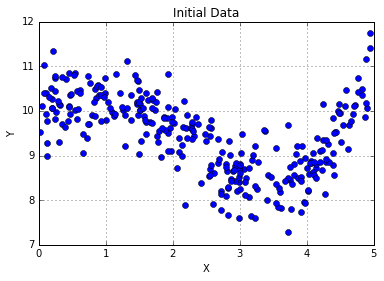

In [5]:
df = pnd.read_csv("data/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств двумя способами</p>

In [6]:
# Способ 1
x = x.reshape(-1, 1)
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)
# Способ 2
kf = cross_validation.KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

<p>3. Обучение</p>

In [7]:
linReg = LinearRegression(normalize=True)
linReg = linReg.fit(x_train, y_train)

linRegress = LinearRegression(normalize=True)

<p>4. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

In [8]:
# Функция, которая считает и возвращает MSE
def lin_regr_fit_mse(deg, x, y, x_val, y_val):
    pl_linReg = Pipeline([("plF", PolynomialFeatures(degree=deg)), ("lr", linReg)])
    pl_linReg = pl_linReg.fit(x, y)
    return mean_squared_error(y, pl_linReg.predict(x)), mean_squared_error(y_val, pl_linReg.predict(x_val))

In [9]:
# Функция, которая строит график зависимости MSE от степени полинома
def plot_deg_mse(name, deg, train, val, height=4, width=17):
    plt.figure(1, figsize=[width, height])
    plt.xticks(deg)
    plt.title(name)
    plt.plot(deg, train, color='red', lw=2)
    plt.plot(deg, val, color='blue', lw=2)
    plt.legend(["TRAIN MSE", "VALIDATION MSE"])
    plt.ylabel('MSE')
    plt.xlabel('Degree')
    plt.grid(True)
    plt.show()

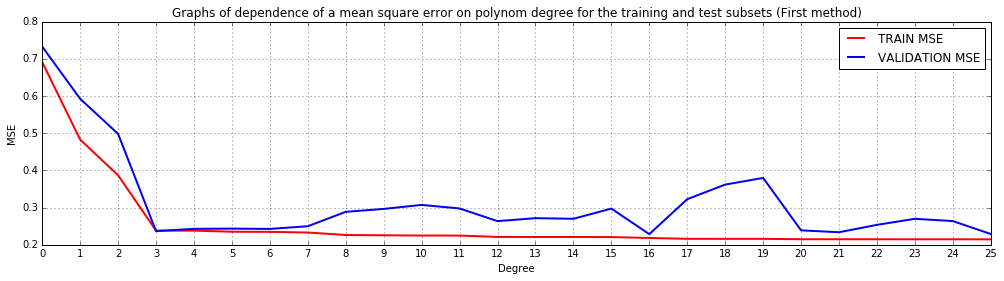

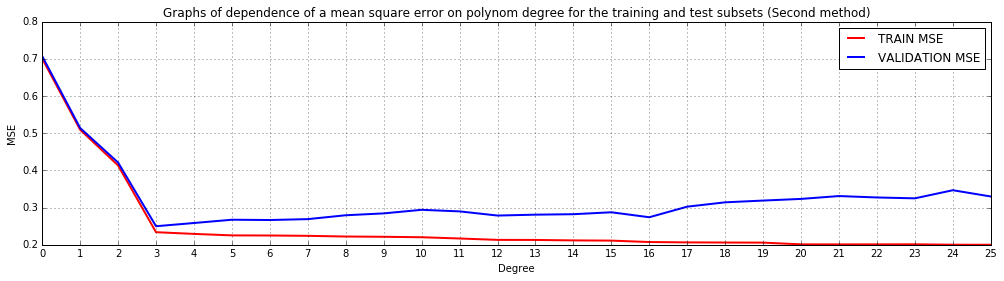

In [10]:
# Способ 1
deg, _train, _val = [i for i in range(0, 26)], [], []

for i in deg:
    trainRes, valRes = lin_regr_fit_mse(i, x_train, y_train, x_val, y_val)
    _train.append(trainRes)
    _val.append(valRes)

# Способ 2
degr, trainList, valList = [i for i in range(0, 26)], [], []
for i in degr:
    trainDeg = []
    valDeg = []
    for train, val in kf:
        trainResult, valResult = lin_regr_fit_mse(i, x_train_init[train], y_train_init[train], x_train_init[val], y_train_init[val])
        trainDeg.append(trainResult)
        valDeg.append(valResult)
    trainList.append(np.mean(trainDeg))
    valList.append(np.mean(valDeg))
    
plot_deg_mse("Graphs of dependence of a mean square error on polynom degree for the training and test subsets (First method)", deg, _train, _val)
plot_deg_mse("Graphs of dependence of a mean square error on polynom degree for the training and test subsets (Second method)", degr, trainList, valList)

<p>5. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

In [11]:
# Функция, которая считает и возвращает коэффициент детерминации 
def lin_regr_fit_rr(deg, x, y, x_val, y_val):
    pl_linReg = Pipeline([("plF", PolynomialFeatures(degree=deg)), ("lr", linReg)])
    pl_linReg = pl_linReg.fit(x, y)
    return pl_linReg.score(x, y), pl_linReg.score(x_val, y_val)

In [12]:
# Функция, которая строит график зависимости R^2 от степени полинома
def plot_deg_rr(name, deg, train, val, height=4, width=17):
    plt.figure(1, figsize=[width, height])
    plt.xticks(deg)
    plt.title(name)
    plt.plot(deg, train, color='red', lw=2)
    plt.plot(deg, val, color='blue', lw=2)
    plt.legend(["TRAIN R^2", "VALIDATION R^2"], loc=4)
    plt.ylabel('R^2')
    plt.xlabel('Degree')
    plt.grid(True)
    plt.show()

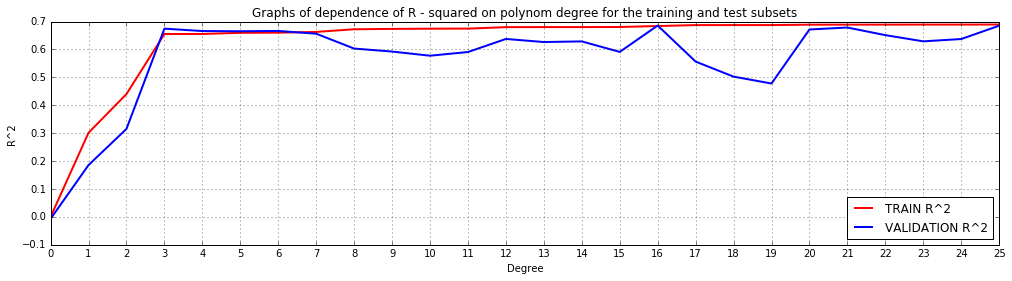

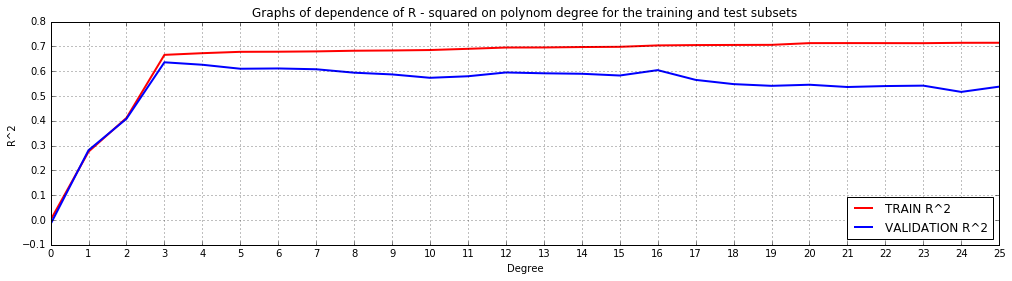

In [13]:
# Способ 1
r2_train, r2_val = [], []

for i in deg:
    trainRes, valRes = lin_regr_fit_rr(i, x_train, y_train, x_val, y_val)
    r2_train.append(trainRes)
    r2_val.append(valRes)

# Способ 2
rr_train, rr_val = [], []

for i in degr:
    trainDeg = []
    valDeg = []
    for train_, val_ in kf:
        trainRes, valRes = lin_regr_fit_rr(i, x_train_init[train_], y_train_init[train_], x_train_init[val_], y_train_init[val_])
        trainDeg.append(trainRes)
        valDeg.append(valRes)
    rr_train.append(np.mean(trainDeg))
    rr_val.append(np.mean(valDeg))
    
plot_deg_rr("Graphs of dependence of R - squared on polynom degree for the training and test subsets", deg, r2_train, r2_val)
plot_deg_rr("Graphs of dependence of R - squared on polynom degree for the training and test subsets", degr, rr_train, rr_val)

<p>6. Выбор степени полинома + повторное обучение модели на train_init</p>

In [14]:
print(np.argmin(_val), np.argmin(valList))
# выберем степень полинома исходя из соображений минимизации функционала качества
# оптимальная степень полинома для первого случая 16, а для второго 3 

16 3


In [15]:
pl_linReg_16 = Pipeline([("plF16", PolynomialFeatures(degree=16)), ("lr", linReg)])
pl_linReg_16 = pl_linReg_16.fit(x_train_init, y_train_init)
pl_linReg_3 = Pipeline([("plF3", PolynomialFeatures(degree=3)), ("lr", linRegress)])
pl_linReg_3 = pl_linReg_3.fit(x_train_init, y_train_init)

<p>7. Cреднеквадратическая ошибка на тестовом подмножестве</p>

In [16]:
print('MSE for 16 degrees = {}'.format(mean_squared_error(y_test, pl_linReg_16.predict(x_test))),
      '\nMSE for  3 degrees = {}'.format(mean_squared_error(y_test, pl_linReg_3.predict(x_test))))

MSE for 16 degrees = 0.2601929175639905 
MSE for  3 degrees = 0.2229766057240427


<p>8. График функции регрессии (наилучший случай) + исходные данные</p>

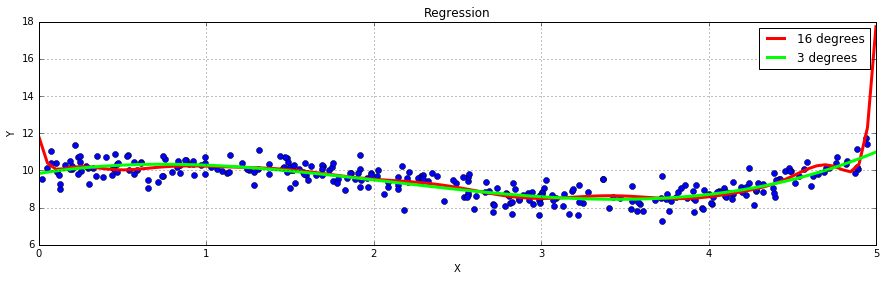

In [17]:
# Способ 1 и 2
x_plot = np.linspace(0, 5, 100)
plt.figure(1, figsize=[15, 4])
plt.title("Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.plot(x_plot, pl_linReg_16.predict(x_plot.reshape(-1,1)), color='red', lw=3, label = '16 degrees')
plt.plot(x_plot, pl_linReg_3.predict(x_plot.reshape(-1,1)), color='lime', lw=3, label = '3 degrees')
plt.legend()
plt.grid(True)
plt.show()

<p>9. Сравнение результатов для различных способов</p>

In [18]:
# Модель со степенью полинома 3 (с помощью k-fold) имеет меньшую ошибку на валидационной выборке, а так же судя по графику
# имеет не такой сложный график функции, как полином 16 степени (явно переобучен, так как слишком сложный график функции).
# Отдаем предпочтение полиному степени 3.

<p><b>Задача 2.</b> Классификация + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

<p>1. Загрузка исходных данных</p>

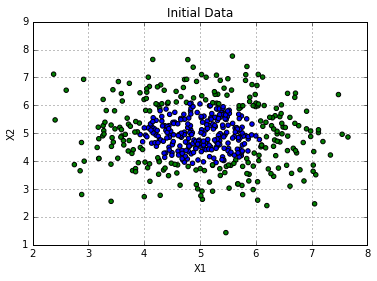

In [19]:
df = pnd.read_csv("data/Cl_A5_V"+str(variant)+".csv") #variant - вариант задания

plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств</p>

In [20]:
# Способ 1
x = np.array(list(zip(df.X1.values, df.X2.values)))
y = df.Y.values
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
kf_cl = cross_validation.KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

<p>3. Обучение</p>

In [21]:
# Способ 1
logReg = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, solver="lbfgs", random_state=12345)
logReg = logReg.fit(x_train, y_train)

# Способ 2
kf_cl = cross_validation.KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

<p>4. Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</p>

In [22]:
# Функция для подсчета доли правильных классификаций
def log_regr_score(x_train, y_train, x_val, y_val, deg_cl=2, n=100):
    pl_logReg = Pipeline([("plF", PolynomialFeatures(degree=deg_cl)),
                          ("lgr", LogisticRegression(penalty="l2", fit_intercept=True,
                            max_iter=n, C=1e5, solver="lbfgs", random_state=12345))])
    pl_logReg = pl_logReg.fit(x_train, y_train)
    return pl_logReg.score(x_train, y_train), pl_logReg.score(x_val, y_val)

# Функция, которая позволит строить графики зависимости классификаций от степени полинома
def plot_deg_acc(name, deg, train, val, height=4, width=17):
    plt.figure(1, figsize=[width, height])
    plt.xticks(deg)
    plt.title(name)
    plt.plot(deg, train, color='red', lw=2)
    plt.plot(deg, val, color='blue', lw=2)
    plt.legend(["TRAIN accuracy", "VALIDATION accuracy"], loc=4)
    plt.ylabel('Accuracy')
    plt.xlabel('Degree')
    plt.grid(True)
    plt.show()

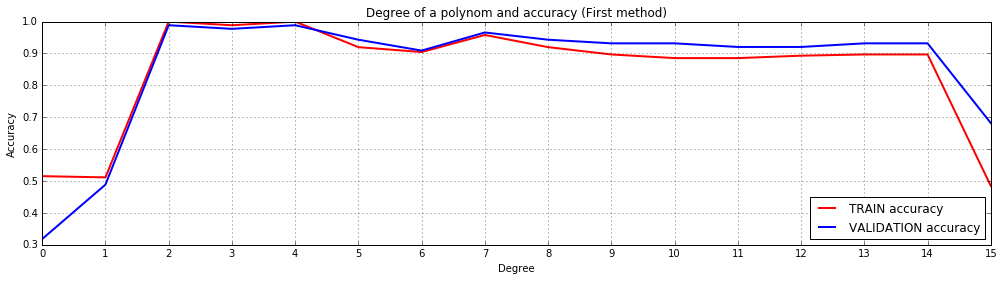

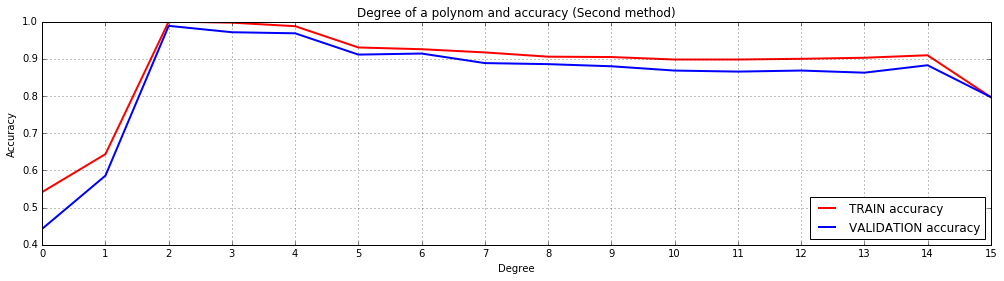

In [23]:
# Способ 1
deg_cl = [i for i in range(0, 16)]
train_cl = []
val_cl = []

for i in deg_cl:
    trainRes, valRes = log_regr_score(x_train, y_train, x_val, y_val, deg_cl=i)    
    train_cl.append(trainRes)
    val_cl.append(valRes)
    
# Способ 2    
deg_clas = [i for i in range(0, 16)]
trainList_cl = []
valList_cl = []

for j in deg_clas:
    trainDeg_cl = []
    valDeg_cl = []
    for train_clas, val_clas in kf_cl:
        trainResult_cl, valResult_cl = log_regr_score(x_train_init[train_clas], y_train_init[train_clas], x_train_init[val_clas], y_train_init[val_clas], deg_cl=j)
        trainDeg_cl.append(trainResult_cl)
        valDeg_cl.append(valResult_cl)
    trainList_cl.append(np.mean(trainDeg_cl))
    valList_cl.append(np.mean(valDeg_cl))

# Строим графики!
plot_deg_acc("Degree of a polynom and accuracy (First method)", deg_cl, train_cl, val_cl)
plot_deg_acc("Degree of a polynom and accuracy (Second method)", deg_clas, trainList_cl, valList_cl)

In [24]:
print('Степень полинома для 1 способа = {}'.format(np.argmax(val_cl)),
      '\nСтепень полинома для 2 способа = {}'.format(np.argmax(valList_cl)))

Степень полинома для 1 способа = 2 
Степень полинома для 2 способа = 2


<p>5. Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного подмножеств для наилучшего случая - изменение параметра max_iter</p>

In [25]:
# Функция, которая строит графики количества правильных классификаций от количества итераций
def plot_deg_acc_it(name, deg, train, val, height=4, width=17):
    plt.figure(1, figsize=[width, height])
    plt.xticks(deg)
    plt.title(name)
    plt.plot(deg, train, color='red', lw=2)
    plt.plot(deg, val, color='blue', lw=2)
    plt.legend(["TRAIN ACCURACY", "VALIDATION ACCURACY"])
    plt.ylabel('ACCURACY')
    plt.xlabel('NUMBER OF ITERATION')
    plt.grid(True)
    plt.show()

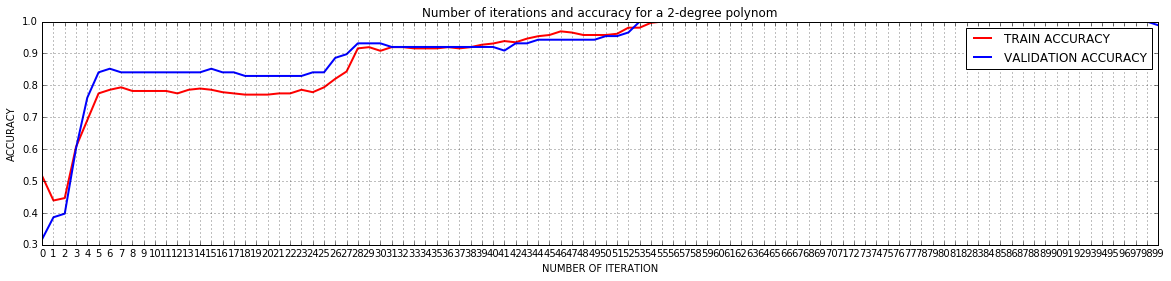

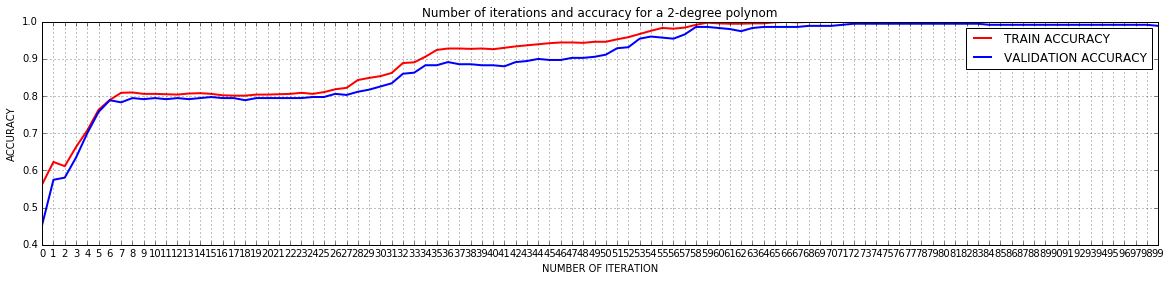

In [26]:
# Способ 1
num = [i for i in range(0, 100)]
train = []
val = []
for i in num:
    trainRes, valRes = log_regr_score(x_train, y_train, x_val, y_val, n=i)   
    train.append(trainRes)
    val.append(valRes)

# Способ 2
num_clas = [i for i in range(0, 100)]
trainList_cl2 = []
valList_cl2 = []

for k in num_clas:
    trainDeg_cl2 = []
    valDeg_cl2 = []
    for train_clas2, val_clas2 in kf_cl:
        trainResult_cl2, valResult_cl2 = log_regr_score(x_train_init[train_clas2], y_train_init[train_clas2], x_train_init[val_clas2], y_train_init[val_clas2], n=k)
        trainDeg_cl2.append(trainResult_cl2)
        valDeg_cl2.append(valResult_cl2)
    trainList_cl2.append(np.mean(trainDeg_cl2))
    valList_cl2.append(np.mean(valDeg_cl2))
# Строим графики!
plot_deg_acc_it("Number of iterations and accuracy for a 2-degree polynom", num, train, val, width=20)
plot_deg_acc_it("Number of iterations and accuracy for a 2-degree polynom", num_clas, trainList_cl2, valList_cl2, width=20)

<p>6. Повторное обучение на train_init наилучшей модели по данным из пункта 4</p>

In [27]:
print('Количество итераций для 1 способа = {}'.format(np.argmax(val)),
      '\nКоличество итераций для 2 способа = {}'.format(np.argmax(valList_cl2)))

Количество итераций для 1 способа = 53 
Количество итераций для 2 способа = 72


In [28]:
pl_regr_2_53 = Pipeline([("plF", PolynomialFeatures(degree=2)),
                        ("lgr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=53, 
                                                   C=1e5, solver="lbfgs", random_state=12345))])
pl_regr_2_53 = pl_regr_2_53.fit(x_train_init, y_train_init)

pl_regr_2_72 = Pipeline([("plF", PolynomialFeatures(degree=2)),
                        ("lgr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=72, 
                                                   C=1e5, solver="lbfgs", random_state=12345))])
pl_regr_2_72 = pl_regr_2_72.fit(x_train_init, y_train_init)

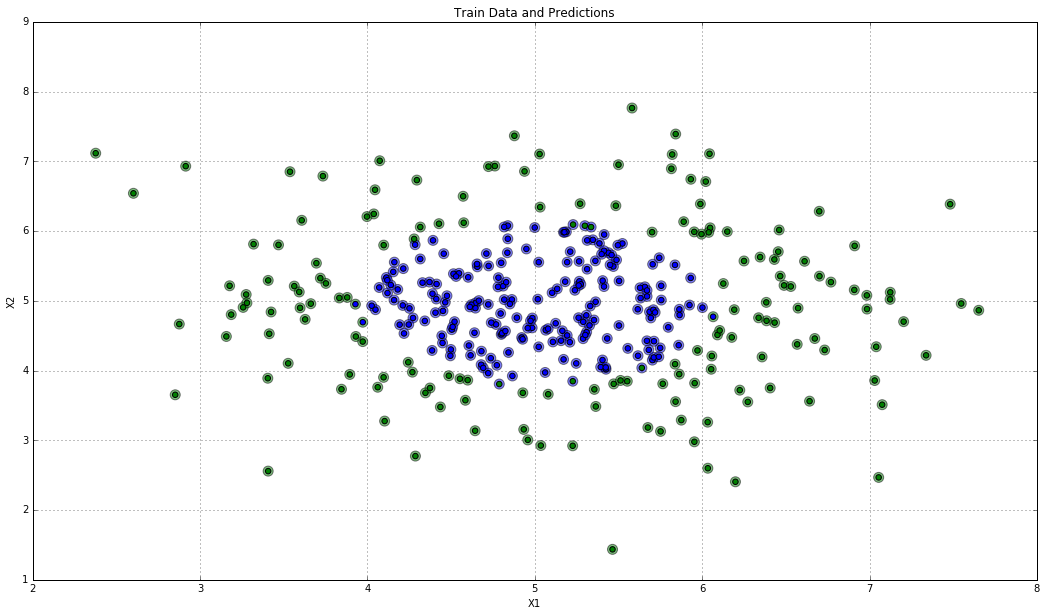

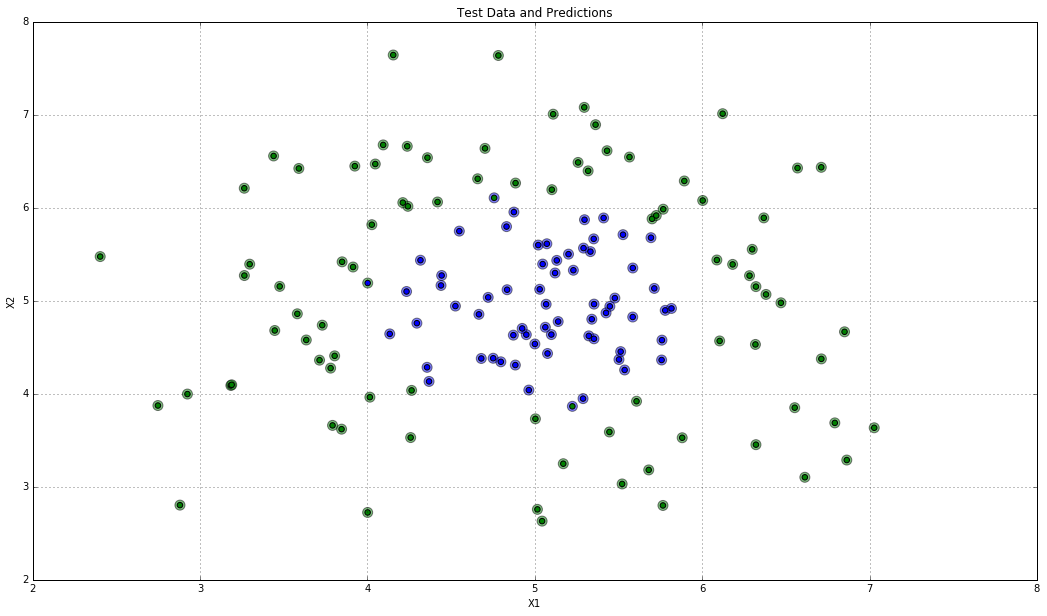

Доля правильных ответов на тестовой выборке = 0.98
Доля правильных ответов на обучающей выборке = 0.9742857142857143


In [29]:
#Способ 1
#График результата классификации для полинома 2 степени и 53 итераций для обучающего и тестового подмножеств

def plot_classif(name, x, y, m):
    x1 = [i[0] for i in x]
    x2 = [i[1] for i in x]
    
    plt.figure(1, figsize=[18, 10])
    plt.title(name)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.scatter(x1, x2, c=m.predict(x), s=100, cmap=clrMap, alpha=0.5)
    plt.scatter(x1, x2, c=y, s=30, cmap=clrMap)
    plt.grid(True)
    plt.show()

plot_classif("Train Data and Predictions", x_train_init, y_train_init, pl_regr_2_53)
plot_classif("Test Data and Predictions", x_test, y_test, pl_regr_2_53)

print('Доля правильных ответов на тестовой выборке = {}'.format(accuracy_score(y_test, pl_regr_2_53.predict(x_test))))
print('Доля правильных ответов на обучающей выборке = {}'.format(accuracy_score(y_train_init, pl_regr_2_53.predict(x_train_init))))

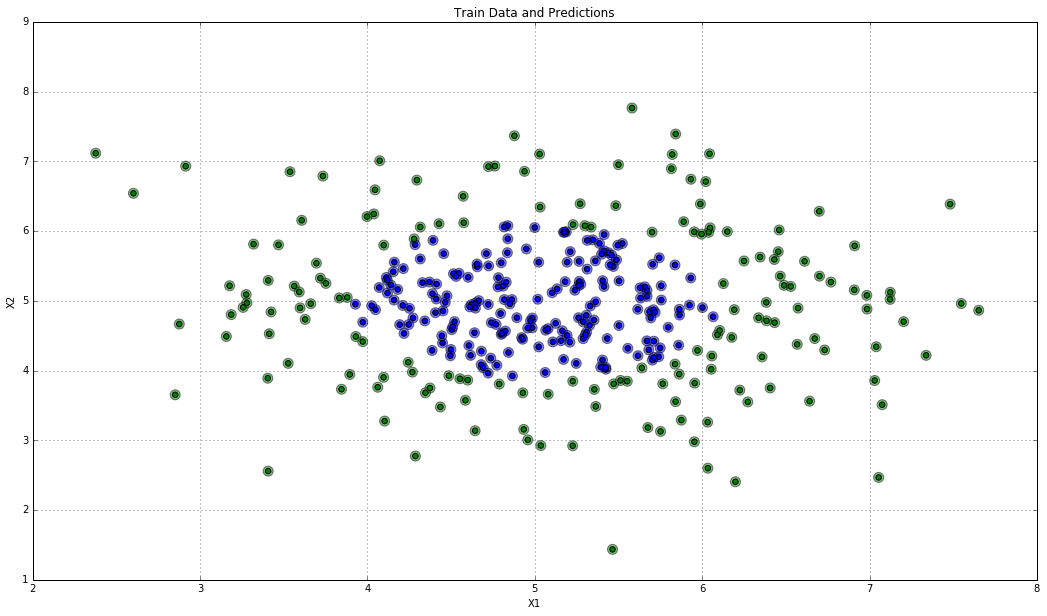

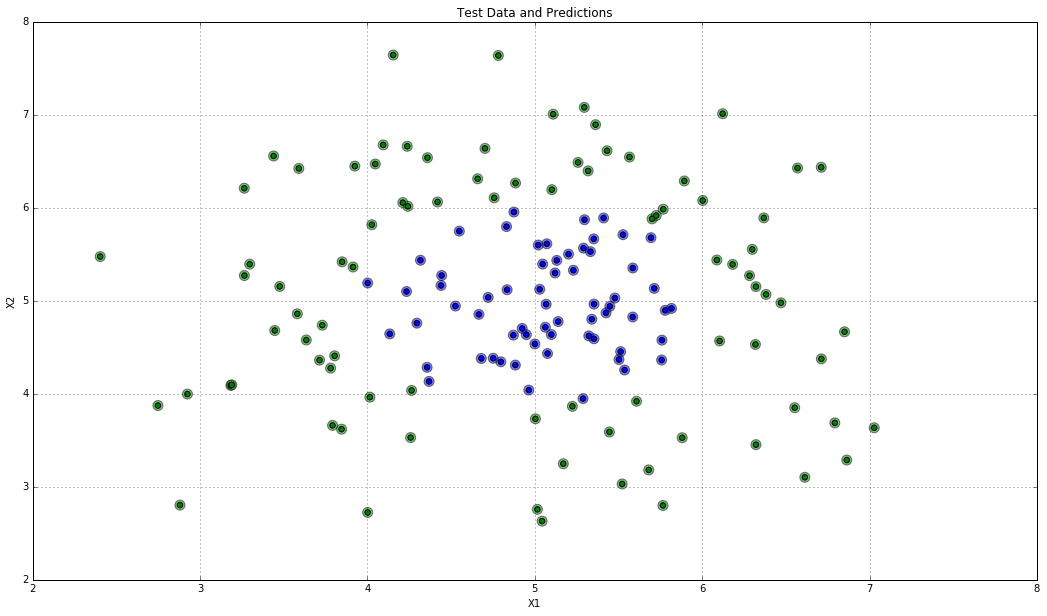

Доля правильных ответов на тестовой выборке = 1.0
Доля правильных ответов на обучающей выборке = 1.0


In [30]:
#Способ 2
#График результата классификации для полинома 2 степени и 72 итераций для обучающего и тестового подмножеств

plot_classif("Train Data and Predictions", x_train_init, y_train_init, pl_regr_2_72)
plot_classif("Test Data and Predictions", x_test, y_test, pl_regr_2_72)
print('Доля правильных ответов на тестовой выборке = {}'.format(accuracy_score(y_test, pl_regr_2_72.predict(x_test))))
print('Доля правильных ответов на обучающей выборке = {}'.format(accuracy_score(y_train_init, pl_regr_2_72.predict(x_train_init))))

<p><b>Задача 3.</b> Регрессия + регуляризация</p>

<p>1. Загрузка исходных данных</p>

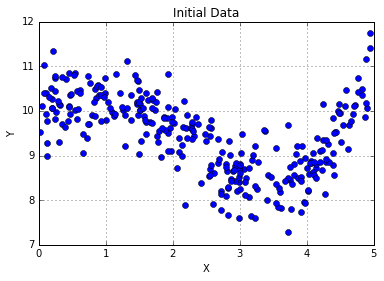

In [31]:
from sklearn.linear_model import Ridge
df = pnd.read_csv("data/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Обучение с кросс-валидацией (см. задачу 1 способ 2) и с использованием Ridge при различных значениях коэф. регуляризации</p>

In [32]:
x = x.reshape(-1,1)
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
kf_rid = cross_validation.KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

In [33]:
x_trainr, x_valr, y_trainr, y_valr = [], [], [], []

for t_index, tt_index in kf_rid:
    xtrain, xval = x_train_init[t_index], x_train_init[tt_index]
    x_trainr.append(xtrain.reshape(-1, 1))
    x_valr.append(xval.reshape(-1, 1))
    
    ytrain, yval = y_train_init[t_index], y_train_init[tt_index]
    y_trainr.append(ytrain)
    y_valr.append(yval)

In [34]:
# Считаем ошибку для каждого коэффициента регуляризации

alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))
MSEtt, MSEt = [], []

for i in range(len(alphas)):
    _MSEtt, _MSEt = [], []
    for j in range(4):       
        polynomial_x = PolynomialFeatures(degree=16)
        polynomial_xtr = polynomial_x.fit_transform(x_trainr[j])
        polynomial_xval = polynomial_x.fit_transform(x_valr[j])
        
        rid_regression = Ridge(alpha = alphas[i], fit_intercept=True, normalize=True, random_state=12345)
        rid_regression.fit(polynomial_xtr, y_trainr[j])
        
        _MSEtt.append(mean_squared_error(y_valr[j], rid_regression.predict(polynomial_xval)))
        _MSEt.append(mean_squared_error(y_trainr[j], rid_regression.predict(polynomial_xtr)))
        
    MSEtt.append(np.array(_MSEtt).mean())
    MSEt.append(np.array(_MSEt).mean())

<p>3. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

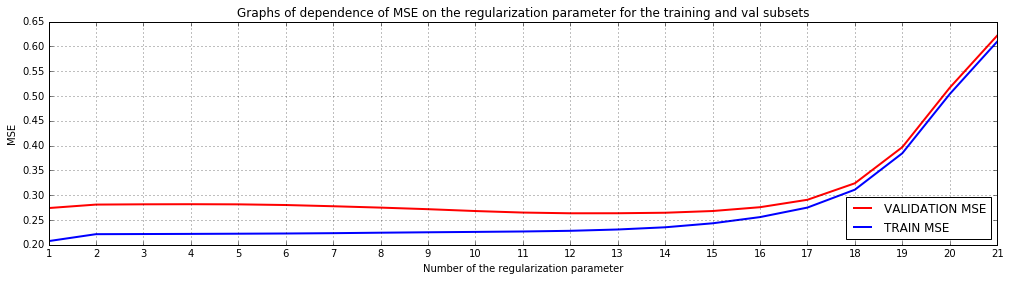

In [35]:
# Строим график зависимости среднеквадратической ошибки от коэффициента регуляризации
plt.figure(1, figsize=[17, 4])
xx = [i for i in range(1, 22)]
plt.xticks([i for i in range(1, 22)])
plt.title("Graphs of dependence of MSE on the regularization parameter for the training and val subsets")
plt.plot(xx, MSEtt, color='red', lw=2)
plt.plot(xx, MSEt, color='blue', lw=2)
plt.legend(["VALIDATION MSE", "TRAIN MSE"], loc=4)
plt.ylabel('MSE')
plt.xlabel('Number of the regularization parameter')
plt.grid(True)
plt.show()

<p>4. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

In [36]:
# Считаем коэффициент детерминации для каждого коэффициента регуляризации
RRtt, RRt = [], []

for i in range(len(alphas)):
    _RRtt, _RRt = [], []
    for j in range(4):       
        polynomial_x = PolynomialFeatures(degree=16)
        polynomial_xtr = polynomial_x.fit_transform(x_trainr[j])
        polynomial_xval = polynomial_x.fit_transform(x_valr[j])
        
        rid_regression = Ridge(alpha = alphas[i], fit_intercept=True, normalize=True, random_state=12345)
        rid_regression.fit(polynomial_xtr, y_trainr[j])
        
        _RRtt.append(r2_score(y_valr[j], rid_regression.predict(polynomial_xval)))
        _RRt.append(r2_score(y_trainr[j], rid_regression.predict(polynomial_xtr)))
        
    RRtt.append(np.array(_RRtt).mean())
    RRt.append(np.array(_RRt).mean())

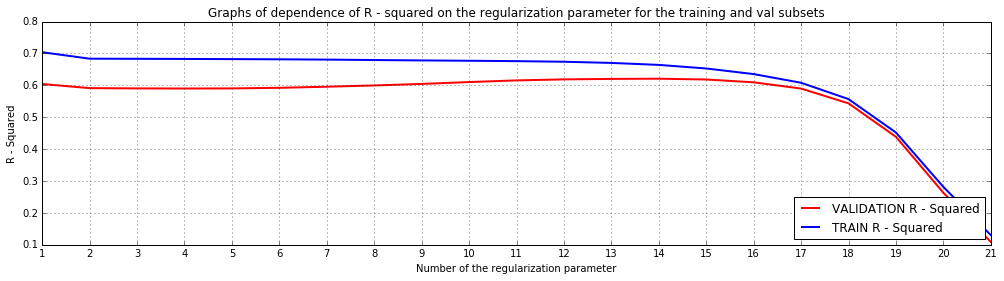

In [37]:
# Строим график зависимости коэффициента детерминации от коэффициента регуляризации
plt.figure(1, figsize=[17, 4])
plt.xticks([i for i in range(1, 22)])
plt.title("Graphs of dependence of R - squared on the regularization parameter for the training and val subsets")
plt.plot(xx, RRtt, color='red', lw=2)
plt.plot(xx, RRt, color='blue', lw=2)
plt.legend(["VALIDATION R - Squared", "TRAIN R - Squared"], loc=4)
plt.ylabel('R - Squared')
plt.xlabel('Number of the regularization parameter')
plt.grid(True)
plt.show()

<p>5. Найти коэф. рег. с минимальной ошибкой на val</p>

In [38]:
print('The best regularization parameter = {}'.format(alphas[np.argmin(MSEtt)]))

The best regularization parameter = 0.0005455594781168515


<p>8. Обучение на train_init с использованием Ridge и параметром alpha=(значение из пункта 2)</p>

In [39]:
pl_linRidge_alpha = Pipeline([("plF", PolynomialFeatures(degree=16)), ("rr", Ridge(alpha = alphas[11], fit_intercept=True, normalize=True))])
pl_linRidge_alpha = pl_linRidge_alpha.fit(x_train_init, y_train_init)

<p>9. Определить ошибку на тестовом подмножестве</p>

In [40]:
mean_squared_error(y_test, pl_linRidge_alpha.predict(x_test))

0.22193716203537711

<p>10. Построить график регрессии</p>

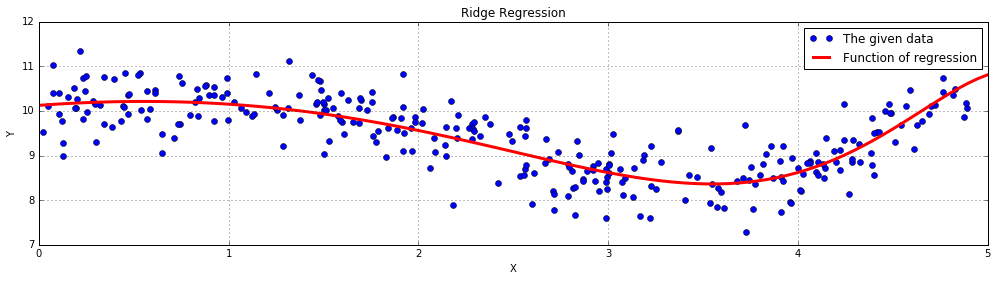

In [41]:
# Строим нашу гребневую регрессию
x_plot = np.linspace(0, 5, 100)
plt.figure(3, figsize=[17, 4])
plt.title("Ridge Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(df.X.values, df.Y.values, "o", label = 'The given data')
plt.plot(x_plot, pl_linRidge_alpha.predict(x_plot.reshape(-1, 1)), color='red', lw=3, label = 'Function of regression')
plt.legend()
plt.grid(True)
plt.show()

<p>11. Сделать заключение о влиянии коэффициента регуляризации</p>

In [129]:
# MSE по сравнению с первой задачей (вторым способом) хоть не сильно, но упала.
# Модель с 16 степенью полинома в этой задаче получается гораздо адекватнее чем в 1 задаче, так как имеет более "разумный" график функции регрессии,
# т.е. мы избавились от слишком сложной (переобученной) модели.
# Как раз за это мы и скажем спасибо коэффициенту регуляризации и скользящему контролю. Спа-си-бо!